# 당뇨병 데이터로 회귀 분석하기 

# 1. 모듈 사용하기

## 데이터 확인용 모듈 사용하기 

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 데이터 로딩용 모듈 

In [2]:
from sklearn.datasets import load_diabetes

## 데이터 분리 모듈 

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

## 스케일작업용 모듈 사용하기 

In [4]:
from sklearn.preprocessing import (StandardScaler,    # 표준
                                  MinMaxScaler,      # 최소최대
                                  Normalizer )         # 정규화 

## 모델 평가용 모듈 사용하기 

In [5]:
from sklearn.metrics import (r2_score,                # r2
                            mean_squared_error )      # 평균오차

## 모델 작성용 모듈 사용하기 

In [6]:
from sklearn.neighbors import KNeighborsRegressor

# 2. 데이터 알아보기

## 기본 제공 데이터 로드하기 

In [7]:
load_dia = load_diabetes()

In [8]:
type(load_dia)

sklearn.utils._bunch.Bunch

## 데이터를 확이하기 위해 데이터프레임으로 변형하기 

In [9]:
df_dia = pd.DataFrame(load_dia['data'], columns=load_dia['feature_names'])

In [10]:
df_dia.shape

(442, 10)

In [11]:
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


## 모든 데이터가 스케일 처리

In [12]:
df_dia.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## 기술통계 확인

In [13]:
df_dia.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-1.444295e-18,2.543215e-18,-2.255925e-16,-4.854086e-17,-1.428596e-17,3.898811e-17,-6.028360e-18,-1.788100e-17,9.243486e-17,1.351770e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


## 정규화 처리 

In [14]:
norm = Normalizer()

In [15]:
norm_data = norm.fit_transform(load_dia.data)

In [16]:
norm_data[0].mean(), norm_data[0].std()

(0.04177292407252002, 0.3134565724537156)

## 데이터를 학습과 테스트용으로 분리하기 : 일반

In [17]:
X_train, X_test, y_train, y_test = train_test_split( load_dia.data, 
                                                    load_dia.target,
                                                    test_size=0.25, 
                                                    random_state=42)

## 데이터를 학습과 테스트용으로 분리하기 : 정규화

In [18]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split( norm_data, 
                                                            load_dia.target,
                                                            test_size=0.25, 
                                                            random_state=42)

In [19]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [20]:
X_train.shape, X_test.shape 

((331, 10), (111, 10))

In [21]:
X_test.shape [0]/load_dia.data.shape[0]

0.251131221719457

## 데이터를 시각화 모듈

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns 

## 4개의 칼럼을 쌍으로 비교해 보기  : 일반 

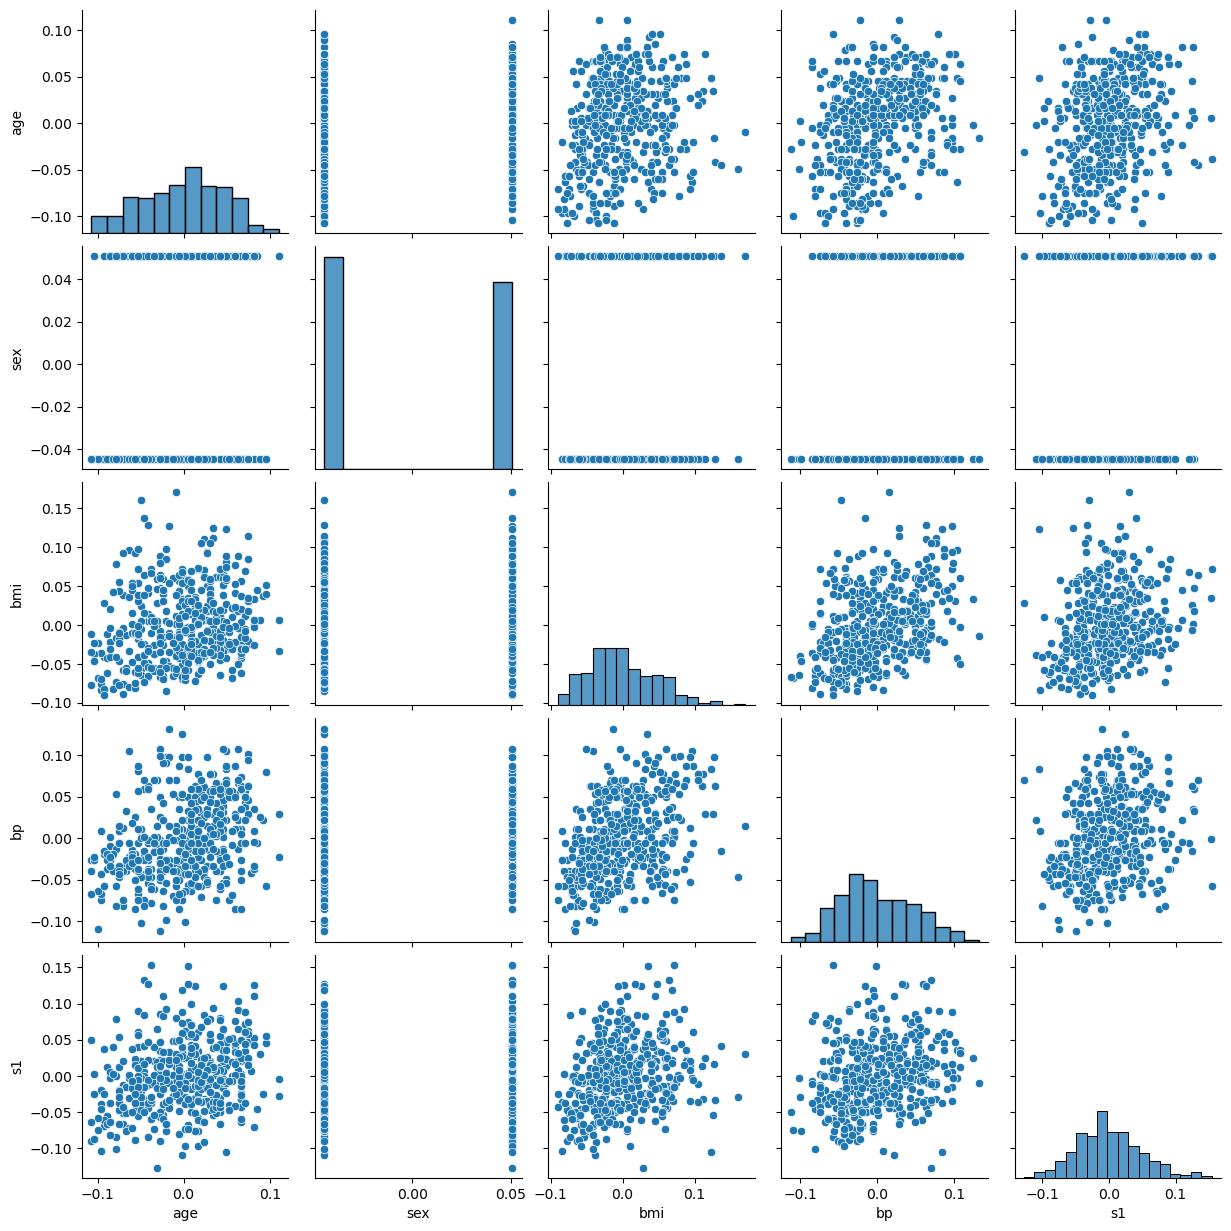

In [23]:
sns.pairplot(df_dia[['age','sex','bmi','bp','s1']])

## 성별을 구분해서 그래프 확인하기  : 일반 

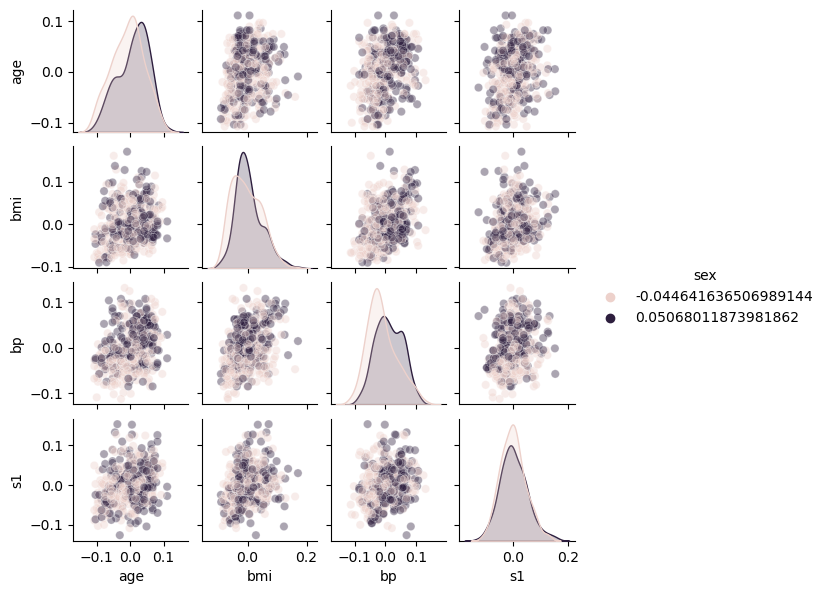

In [24]:
sns.pairplot(df_dia[['age','sex','bmi','bp','s1']], 
            size=1.5, hue='sex',plot_kws={'alpha':0.4})

# 3.  모델 생성 : 일반 데이터

In [25]:
knn = KNeighborsRegressor(n_neighbors=3)

## 모델 학습(train)

In [26]:
fit = knn.fit(X_train, y_train)

In [27]:
fit

KNeighborsRegressor(n_neighbors=3)

## 모델 검증(test) 

In [28]:
pred = fit.predict(X_test)

In [29]:
metrics = mean_squared_error(y_test, pred)

In [30]:
metrics

3471.41941941942

In [31]:
np.sqrt(metrics)

58.91875269741732

In [32]:
r2_score(y_test, pred)

0.37222167132521977

# 4.  모델 생성 : 정규화 데이터

## 모델 생성

In [33]:
knn_n = KNeighborsRegressor(n_neighbors=3)

In [34]:
knn_n

KNeighborsRegressor(n_neighbors=3)

## 모델 학습 

In [35]:
fit_n = knn_n.fit(X_train_n, y_train_n)

## 모델 예측 

In [36]:
pred_n = fit_n.predict(X_test_n)

## 모델 검증 

In [37]:
metrics_n = mean_squared_error(y_test_n, pred_n)

In [38]:
metrics_n

3226.9629629629635

In [39]:
r2_score(y_test, pred)

0.37222167132521977

# 5. 교차검증  :  일반 데이터

## 모델생성 

In [40]:
model = KNeighborsRegressor(10)

In [41]:
model

KNeighborsRegressor(n_neighbors=10)

## 모델검증(교차검증) : 평균오차 

In [42]:
metrics_ar = cross_val_score(model,load_dia.data, load_dia.target, cv=5, scoring="neg_mean_squared_error" )

In [43]:
np.sqrt(abs(metrics_ar))

array([56.62820991, 58.53572711, 59.89943371, 55.1316101 , 57.29399262])

## 모델검증(교차검증) : 결정계수 

In [44]:
metrics_ar_r = cross_val_score(model,load_dia.data, load_dia.target, cv=5, scoring="r2" )

In [45]:
metrics_ar_r

array([0.34196995, 0.45993106, 0.42671668, 0.42063684, 0.49269841])

# 6. 교차검증  :  표준화 데이터

## 모델생성

In [46]:
model_n = KNeighborsRegressor(10)

In [47]:
model_n

KNeighborsRegressor(n_neighbors=10)

## 교차검증

In [48]:
metrics_ar_n = cross_val_score(model_n,norm_data, load_dia.target, cv=5, scoring="neg_mean_squared_error" )

## 모델 평가  

In [49]:
np.sqrt(abs(metrics_ar_n))

array([57.96905606, 56.15916486, 59.20613931, 54.58019538, 56.59134912])

## 교차검증

In [50]:
metrics_ar_r_n = cross_val_score(model,norm_data, load_dia.target, cv=5, scoring="r2" )

## 모델평가

In [51]:
metrics_ar_r_n

array([0.31043927, 0.50289464, 0.43991059, 0.43216822, 0.50506503])